![S Legend](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTwIpP7v3ycNMnjghyjhgmuA91On6Ylqd3BA&s)

# Team S Legend

### EDA Introduction

This notebook is a walkthrough of S Legends exploratory data analysis of the WHO data set in predicting life expectancy. This analysis laid the framework for what we should be paying attention to when selecting features for our model, an idea of modifications that could be made as well as a baseline for us to trial against. 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv('Life Expectancy Data.csv')

#### Overview of dataset and what/if any cleaning needs to be done

In [7]:
raw_data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [8]:
raw_data.shape

(2864, 21)

In [11]:
raw_data.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

Will need to change Object types to correct data type...

(Import to note as well for modelling the data: All non-object data types are numeric)

In [13]:
raw_data.Region.unique()

['Middle East', 'European Union', 'Asia', 'South America', 'Central America and Caribbean', 'Rest of Europe', 'Africa', 'Oceania', 'North America']
Categories (9, object): ['Africa', 'Asia', 'Central America and Caribbean', 'European Union', ..., 'North America', 'Oceania', 'Rest of Europe', 'South America']

In [ ]:
raw_data.Region = raw_data.Region.astype('category')

In [14]:
raw_data.Country.unique()

array(['Turkiye', 'Spain', 'India', 'Guyana', 'Israel', 'Costa Rica',
       'Russian Federation', 'Hungary', 'Jordan', 'Moldova', 'Brazil',
       'Malta', 'Bahamas, The', 'Ukraine', 'Switzerland', 'Norway',
       'Finland', 'Comoros', 'Japan', 'Gabon', 'Ghana', 'Philippines',
       'Congo, Rep.', 'Madagascar', 'Estonia', 'Belize', 'Kazakhstan',
       'Cameroon', 'Zimbabwe', 'Bhutan', 'South Africa', 'Eritrea',
       'Germany', 'Saudi Arabia', 'Kiribati', 'Seychelles', 'Singapore',
       'Togo', 'Denmark', 'Gambia, The', 'Sweden', 'Austria',
       'Kyrgyz Republic', 'Grenada', 'Brunei Darussalam', 'Greece',
       'Uruguay', 'Croatia', 'Romania', 'Central African Republic',
       'Algeria', 'Yemen, Rep.', 'Armenia',
       'St. Vincent and the Grenadines', 'Kenya', 'Micronesia, Fed. Sts.',
       'Antigua and Barbuda', 'Nepal', 'Lithuania', 'Vanuatu',
       'Afghanistan', 'Kuwait', 'Argentina', 'Panama', 'Oman', 'France',
       'Bosnia and Herzegovina', 'Mauritania', 'Somalia

In [15]:
raw_data.Country = raw_data.Country.astype('category')

Also check to see if all expected years are present for each country...

In [16]:
years_required = set(raw_data.Year)

missing_years_countries = raw_data.groupby('Country').filter(
    lambda x: set(x['Year']) != years_required
)['Country']

C:\Users\mpjau\AppData\Local\Temp\ipykernel_22308\3275046221.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_years_countries = raw_data.groupby('Country').filter(


In [17]:
missing_years_countries

Series([], Name: Country, dtype: category
Categories (179, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'Vietnam', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'])

No Years are missing for each country which is another thing we would not have to clean!

Now we can look at exploring the general quality of the data as well as expected quantities...

In [35]:
raw_data.describe()


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


Let's also more clearly at averages per region.

In [42]:
numeric_cols = raw_data.select_dtypes(include='number').columns
region_stats = raw_data.groupby('Region')[numeric_cols].agg(['mean', 'var'])

region_stats

C:\Users\mpjau\AppData\Local\Temp\ipykernel_22308\4251807023.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = raw_data.groupby('Region')[numeric_cols].agg(['mean', 'var'])


Year            Infant_deaths              \
                                 mean        var          mean         var   
Region                                                                       
Africa                         2007.5  21.276074     60.604044  686.071186   
Asia                           2007.5  21.299304     32.536111  439.422776   
Central America and Caribbean  2007.5  21.320132     20.965461  182.364975   
European Union                 2007.5  21.299304      4.872222    6.781547   
Middle East                    2007.5  21.345291     16.639286  157.351275   
North America                  2007.5  21.702128      9.925000   38.663191   
Oceania                        2007.5  21.371429     26.305114  326.141974   
Rest of Europe                 2007.5  21.338912      9.627917   38.916916   
South America                  2007.5  21.361257     19.953646   84.714437   

                              Under_five_deaths              Adult_mortality  \
                                           mean          var            mean   
Region                                                                         
Africa                                94.025000  2096.366491      319.073434   
Asia                                  40.965278   790.053223      171.166565   
Central America and Caribbean         25.932237   423.156911      163.581169   
European Union                         5.858333     9.505220      104.395392   
Middle East                           20.457143   286.817617      111.158891   
North America                         11.647917    54.202974      100.693844   
Oceania                               32.493750   543.779789      162.886801   
Rest of Europe                        11.179583    49.680544      138.582856   
South America                         23.938021   148.679960      155.275326   

                                            Alcohol_consumption             \
                                        var                mean        var   
Region                                                                       
Africa                         15403.565805            2.980694   8.261061   
Asia                            3478.119989            2.401700   6.057305   
Central America and Caribbean   1774.489134            5.623224   7.075283   
European Union                  1920.795962           10.791319   4.568249   
Middle East                     2403.910539            0.884161   0.733419   
North America                    446.805294            7.053125   3.483290   
Oceania                         3067.023510            2.880239  11.023072   
Rest of Europe                  4836.827997            7.580083   8.158586   
South America                   1330.137090            5.745677   2.523070   

                               ... Thinness_five_nine_years             \
                               ...                     mean        var   
Region                         ...                                       
Africa                         ...                 7.199142   7.703177   
Asia                           ...                 9.283796  52.187115   
Central America and Caribbean  ...                 3.269737   2.170962   
European Union                 ...                 1.412037   0.699020   
Middle East                    ...                 5.751339   7.838294   
North America                  ...                 0.904167   0.310621   
Oceania                        ...                 1.922159  10.691449   
Rest of Europe                 ...                 1.990000   0.844921   
South America                  ...                 2.064583   1.662718   

                               Schooling           Economy_status_Developed  \
                                    mean       var                     mean   
Region                                                                        
Africa                          4.593260  4.108531                 0.000

In [9]:
raw_data.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

No Null values initially indicate no cleaning needs to be done. For rigour (as well as starting exploration), we should inspect distributions to ensure they don't look anomolous

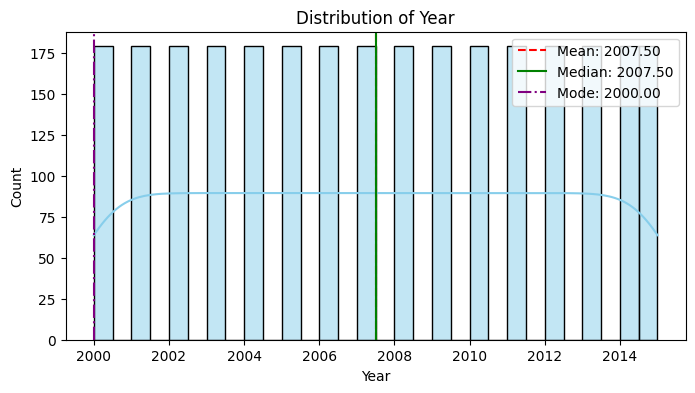

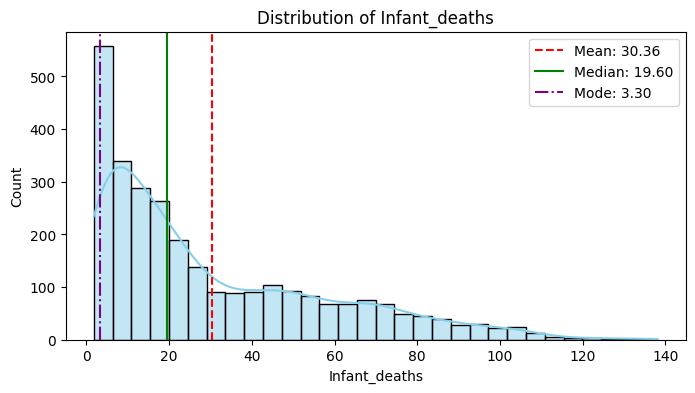

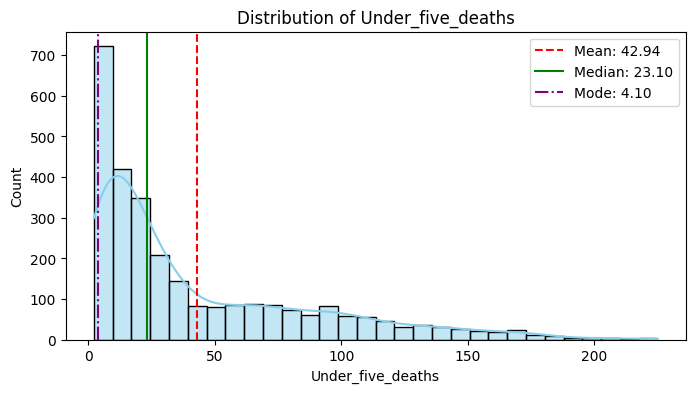

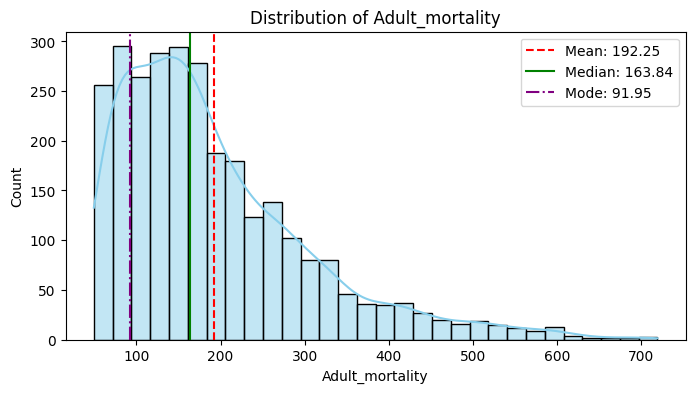

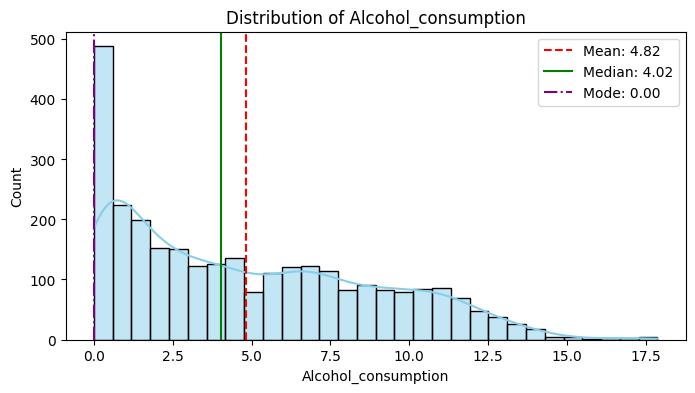

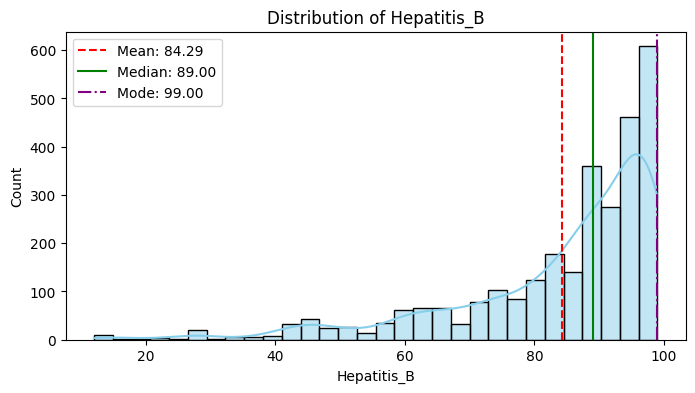

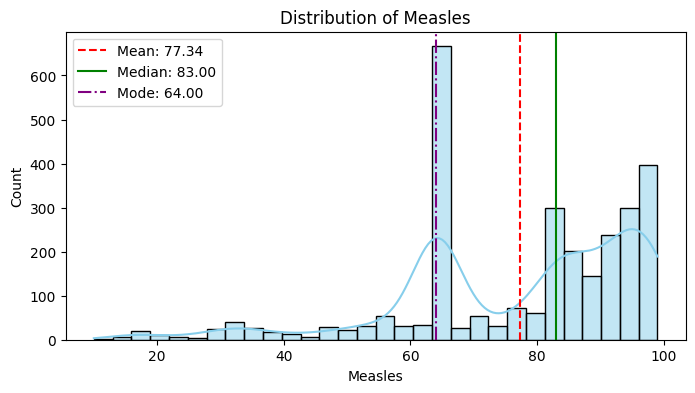

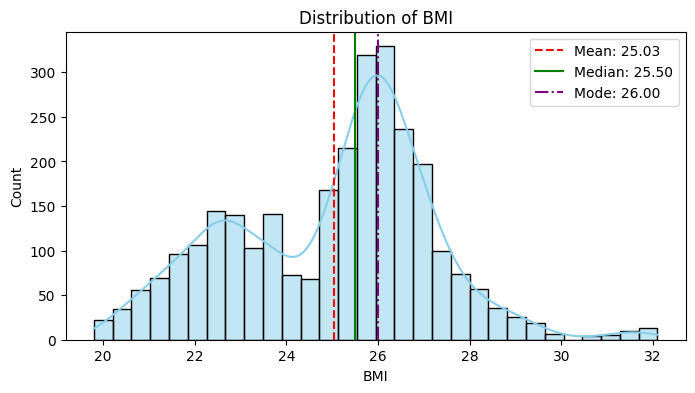

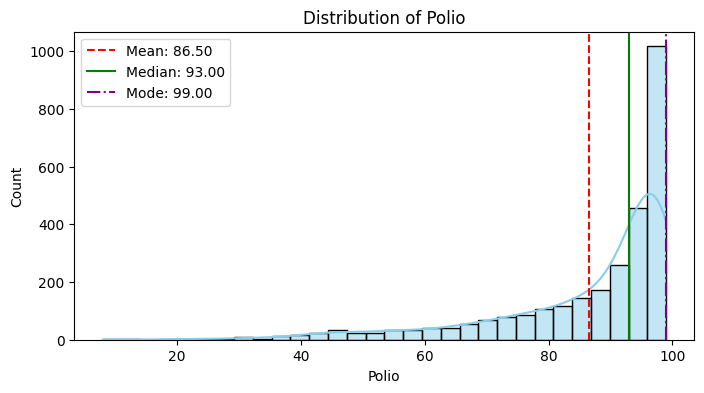

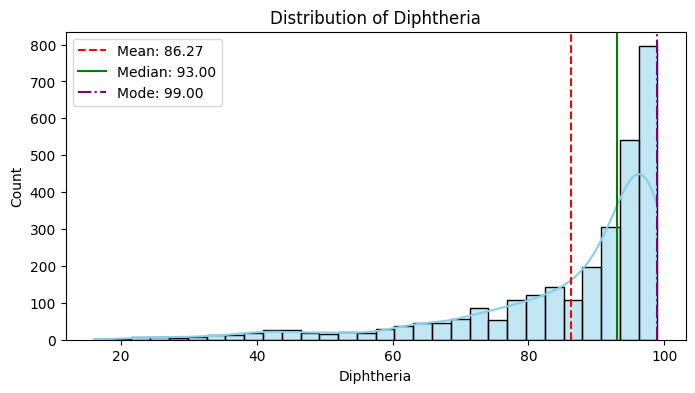

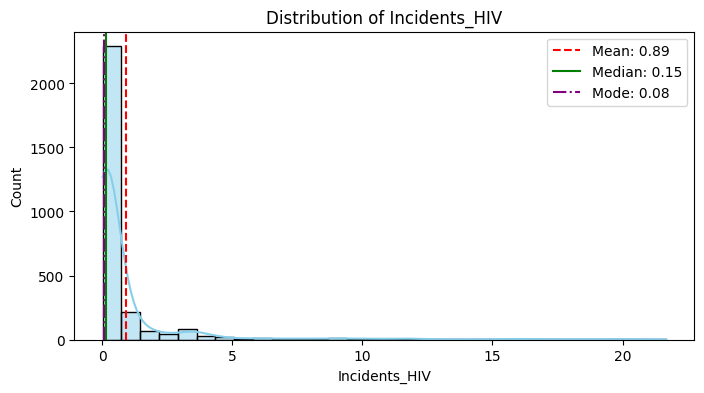

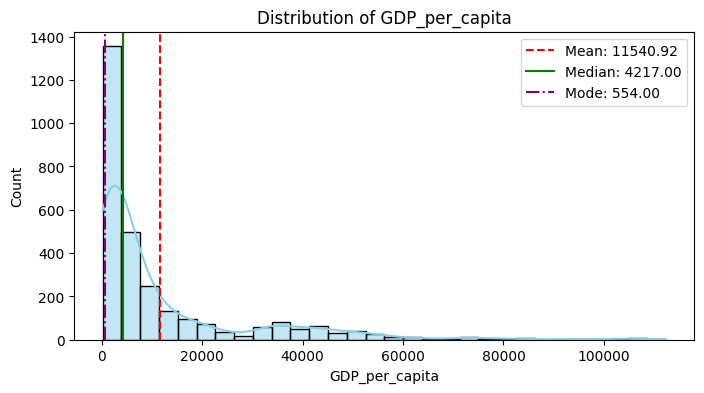

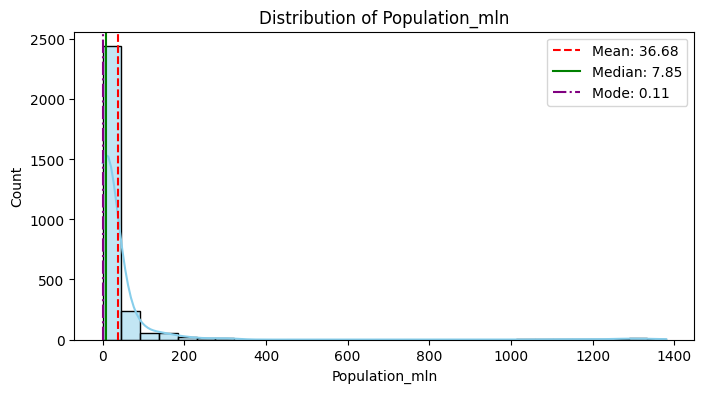

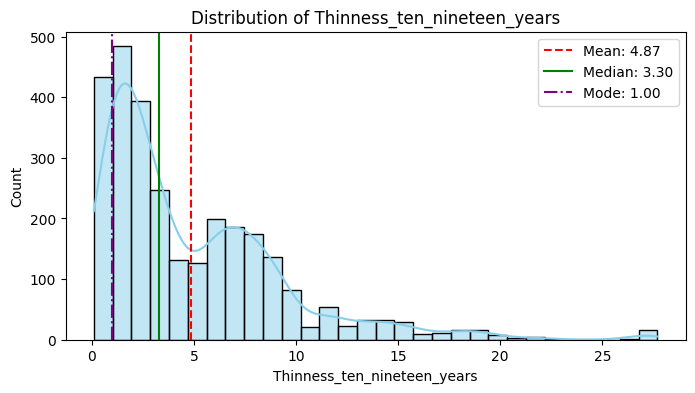

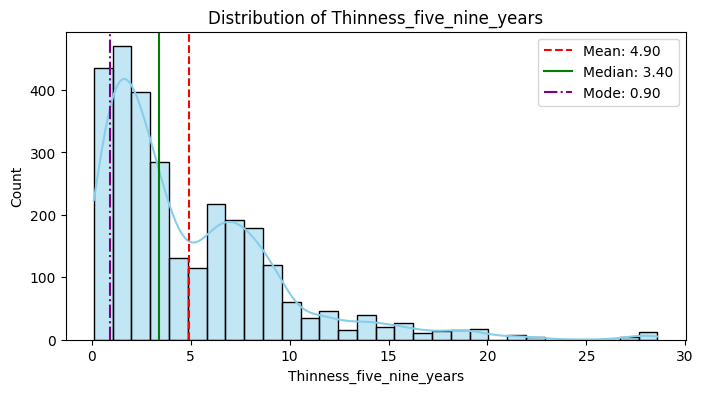

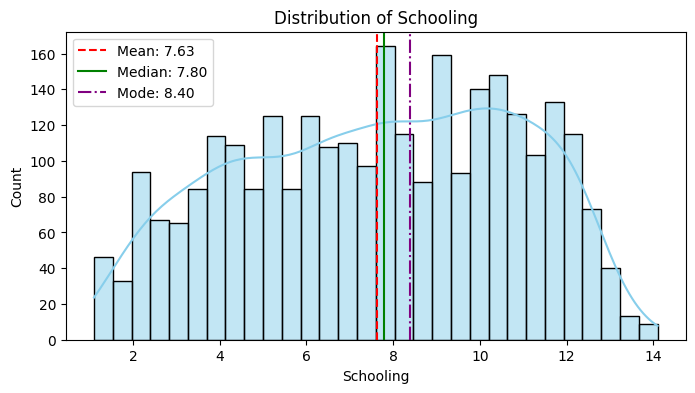

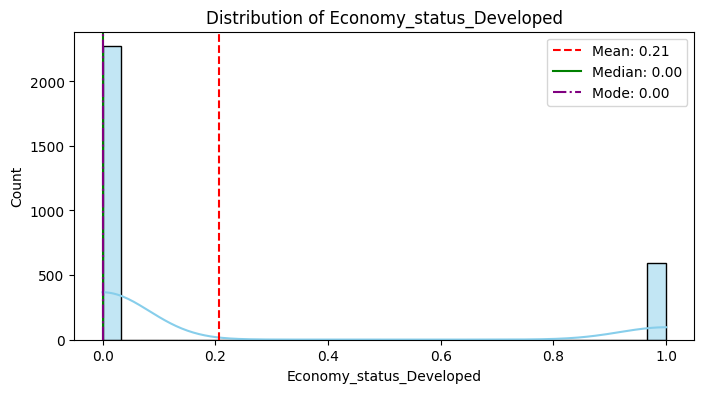

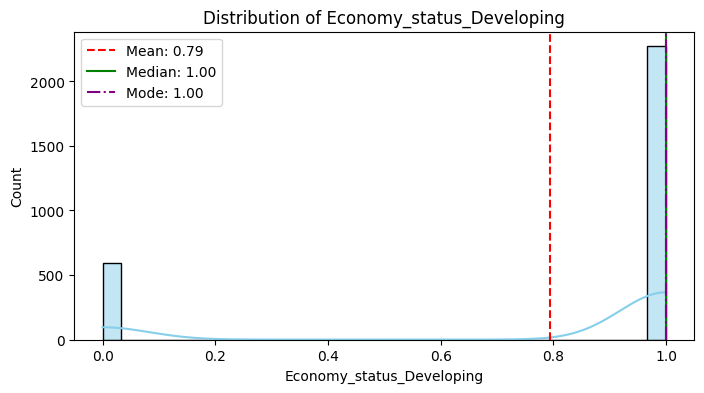

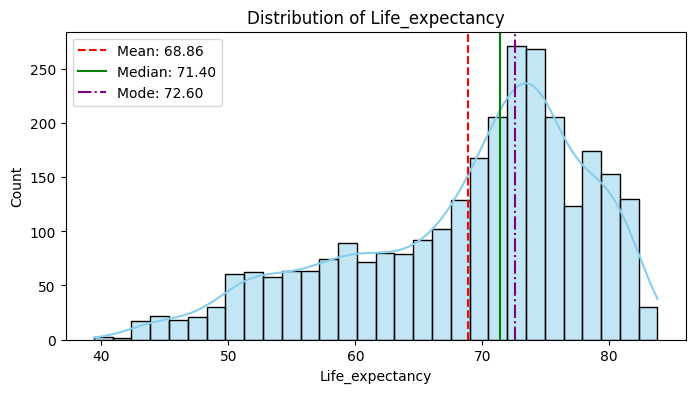

In [19]:
for col in raw_data.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=raw_data, x=col, kde=True, bins=30, color='skyblue')

    mean = raw_data[col].mean()
    median = raw_data[col].median()
    mode = raw_data[col].mode().iloc[0] if not raw_data[col].mode().empty else None

    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    if mode is not None:
        plt.axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.2f}')

    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

All distributions are bell curve in shape which makes sense for larger samples, apart from the Measles distribution.

To investigate this, let's look at the histogram within a smaller range...

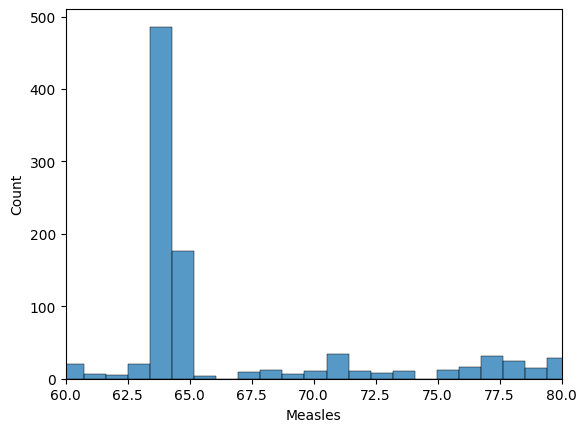

In [20]:
sns.histplot(data=raw_data, x='Measles', bins=100)
plt.xlim(60, 80)  # zoom in on spike
plt.show()

In [25]:
raw_data[(raw_data['Measles'] > 62.5) & (raw_data['Measles'] < 65)].groupby('Region')['Measles'].count().sort_values(ascending=False)

C:\Users\mpjau\AppData\Local\Temp\ipykernel_22308\4125011704.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_data[(raw_data['Measles'] > 62.5) & (raw_data['Measles'] < 65)].groupby('Region')['Measles'].count().sort_values(ascending=False)


Region
Africa                           467
Oceania                           16
Asia                              14
Middle East                        3
European Union                     3
South America                      3
Central America and Caribbean      1
North America                      0
Rest of Europe                     0
Name: Measles, dtype: int64

Inspecting this shows that the majority of these cases are within Africa where the have been known outbreaks following African countries struggles with Ebola. [Source](https://www.princeton.edu/news/2015/03/12/ebola-outbreak-2014-may-have-laid-tracks-deadly-measles-epidemic-africa)

While this could be a good indication of Life Expectancy, it may introduce bias within the model negatively effecting African countries. 

The next thing to look at is how are the columns related to Life Expectancy in Feature Engineering.